In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

π = np.pi
Ω_cdm = 0.85
G = 6.67e-11                # in units of m^3⋅kg^−1⋅s^−2
t_i = 2.358e5                # in units of seconds
t_eq = 1.5923e12            # in units of seconds
ρ_eq = 2.1548e-16          # in units of kg m^-3
M_solar = 1.989e30        # in units of kg
c = 3e8                 #in units of m/s
A = 1.495e11                 # Astronomical unit
pc = 3.085e16               # in unist of meter. 
yr = 3.154e7              # in units of seconds
a_eq = 2.9374e-4

hbar = 1.0545718e-34        # reduced Planck constant in unkits of J.s
eV = 1.60218e-19               #in units of J
eV_to_kg = 1.7826e-36             #in units of kg
m_FDM_eV = 1e-22     #in units of eV/c²
m_FDM = m_FDM_eV * eV_to_kg      # Mass of FDM boson in units of kg


h = 0.67
ρ_c0= 1.9e-26 * (h**2) #kgm^-3  
Ω_r0 = 9.4e-5
Ω_m0 = 0.32
ρ_r0 = Ω_r0 * ρ_c0
ρ_m0 = Ω_m0 * ρ_c0
H_0 = np.sqrt((8 * π * G * ρ_c0)/3)




# Define event functions to detect turnaround points
def event_y_max(t, y, *args):
    return y[1]  # Detect velocity = 0 (turnaround)
event_y_max.terminal = False  
event_y_max.direction = -1  # Detect peak (expansion slowing down)

def event_y_min(t, y, *args):
    return y[1]  # Detect velocity = 0
event_y_min.terminal = True   # Stop at turnaround
event_y_min.direction = 1     # Detect minimum (collapse starts)



def a(t): # as per RD
    return np.sqrt(2 * H_0 * t)

def V_shell(r_outer, r_inner):
    return (4 * π / 3) * (r_outer**3 - r_inner**3)

def rho_DM(t):
    return 0.85 * ρ_m0 * (a(t)**-3)  

def mfdm_shell_initial(r, t):
    return rho_DM(t) * (4/3) * np.pi * (r**3) 


def fdm_EOM(t, y, j):
    r, v = y 
    #print(delta_M[0])
    M_enclosed_total = M_pbh #+  np.sum(delta_M[:j+1])  
    dv_G_dt = -(G * M_enclosed_total)/(r**2)  # G.P.due to PBH only
    dv_QP_dt = QP_arr[j] 
    H_t = 1/(2*t)  # with H(t) = 1/2t in RD
    dv_H_dt = -(H_t*v)  #-ri_arr[j]/(4 * (t**2)) 
    return [v, dv_G_dt + dv_QP_dt + dv_H_dt]

In [2]:
### The first check I would do is to set up the initial conditions
# (define the lists r_j and Delta M_j ) and then calculate the density
# at each point (rho_j) and check that it comes out constant 
# (which is should initially if you’ve set the initial conditions correctly).


t_i = 1e-24
t_f = 1e3
N = 7
r_min, r_max = 1e-8, 1e-4 
ri_arr = np.geomspace(r_min, r_max, N)
t_arr = np.geomspace(t_i, t_f, 1000)  
  

    
    
#  defining the initial densities of the fdm shells
# Here, the initial density of the shells is uniform i.e.
# all the shells should have an initial mass proportional to their volumes.
rho_arr = np.full(len(ri_arr), rho_DM(t_i))
delta_M_arr = np.zeros(len(ri_arr))
for j in range(len(ri_arr) - 1): 
    if j == 0:
        delta_M_arr[j] = rho_DM(t_i) * V_shell(0, ri_arr[j]) 
    else:
        delta_M_arr[j] = rho_DM(t_i) * V_shell(ri_arr[j-1], ri_arr[j])  
        
delta_M_arr[-1] = rho_DM(t_i) * V_shell(ri_arr[-2], ri_arr[-1])  

print("rho_arr =", rho_arr, "kg m⁻³")
print("delta_M_arr = " , delta_M_arr, "kg")



rho_arr = [2.54282448e+35 2.54282448e+35 2.54282448e+35 2.54282448e+35
 2.54282448e+35 2.54282448e+35 2.54282448e+35] kg m⁻³
delta_M_arr =  [-1.06513583e+12 -1.05448447e+14 -1.05448447e+16 -1.05448447e+18
 -1.05448447e+20 -1.05448447e+22 -1.05448447e+24] kg


In [4]:
#EOM in dimensionlfull varibales r(t) 

delta_M_arr =  [1.06513583e+09 1.05448447e+11 1.05448447e+13 1.05448447e+15
 1.05448447e+17 1.05448447e+19 1.05448447e+21] kg
rho_arr = [2.54282448e+32 2.54282448e+32 2.54282448e+32 2.54282448e+32
 2.54282448e+32 2.54282448e+32 2.54282448e+32] kg m⁻³


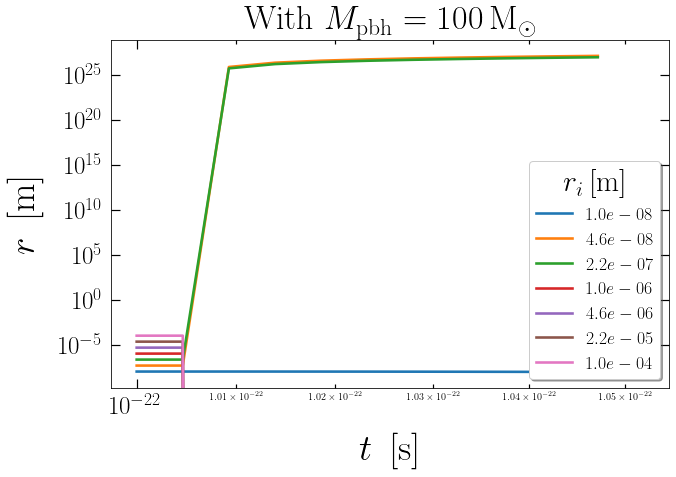

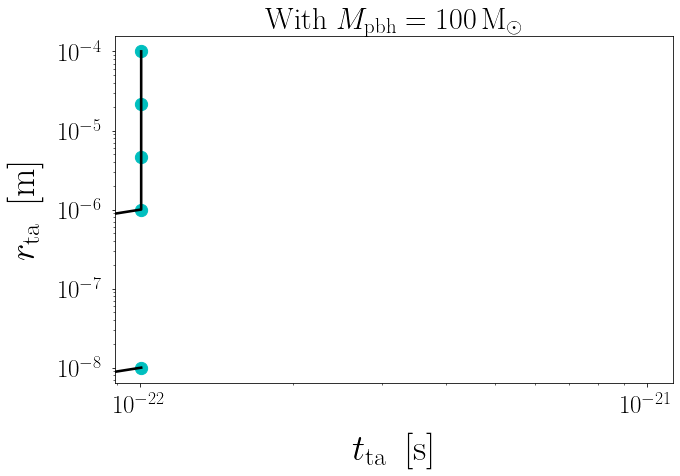

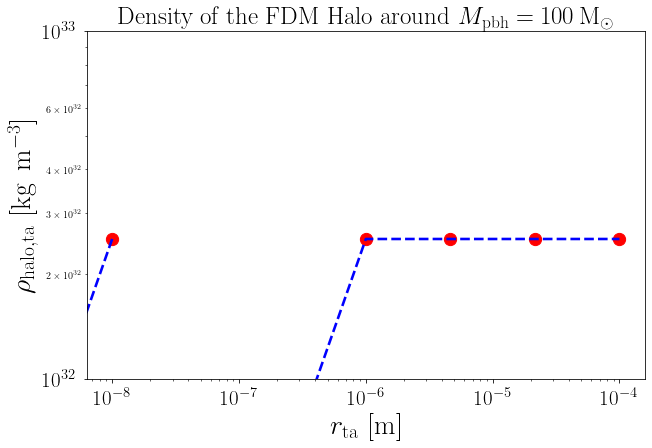

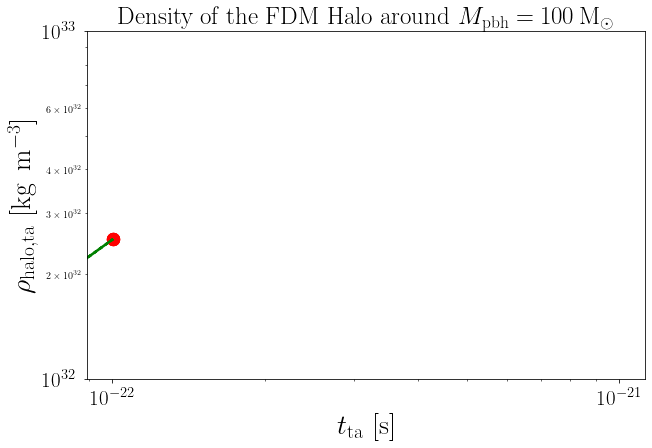

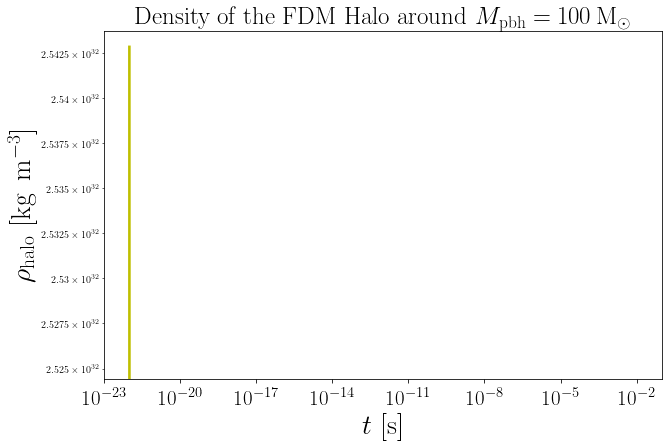

In [12]:
t_i, t_f = 1e-22, 1e-2
r_min, r_max = 1e-8, 1e-4 
N = 7
ri_arr = np.geomspace(r_min, r_max, N)
t_arr = np.geomspace(t_i, t_f, 10000)  
dt = np.gradient(t_arr)


 
delta_M_arr = np.zeros(len(ri_arr))
for j in range(len(ri_arr) - 1): 
    rho_arr = np.full(len(ri_arr), rho_DM(t_i))
    if j == 0:
        delta_M_arr[j] = rho_DM(t_i) * V_shell(ri_arr[j], 0) 
    else:
        delta_M_arr[j] = rho_DM(t_i) * V_shell(ri_arr[j], ri_arr[j-1])  
delta_M_arr[-1] = rho_DM(t_i) * V_shell(ri_arr[-1], ri_arr[-2])  
print("delta_M_arr = " , delta_M_arr, "kg")
print("rho_arr =", rho_arr, "kg m⁻³")
        
        
epsilon = 1e-10       
def QP_function(rho_arr, r):
    grad_rho = np.gradient(rho_arr, r, edge_order=2)
    laplacian_rho = (1/(r**2)) * np.gradient(((r**2) * grad_rho), r, edge_order=2)
    qp_term = (hbar**2/(4 * (m_FDM**2))) * ((laplacian_rho / (rho_arr + epsilon)) - 
        (1/2) * (grad_rho**2 / ((rho_arr )**2 + epsilon)))
    grad_qp_term = np.gradient(qp_term, r, edge_order=2)
    return grad_qp_term



M_PBH = 100 * M_solar   
#V_arr = (4 / 3) * np.pi * (ri_arr**3)
r_sol = np.zeros((N, len(t_arr)))  
v_sol = np.zeros((N, len(t_arr)))  
r_sol[:, 0] = ri_arr  
v_sol[:, 0] = ri_arr/(2*t_i) 
turnaround_detected = np.zeros(N, dtype=bool)
t_ta_arr = np.zeros(N)  
r_ta_arr = np.zeros(N)
dt_arr = np.diff(t_arr)  



def V_shell(r_outer, r_inner):
    return ((4 * π) / 3) * (r_outer**3 - r_inner**3) 


for i in range(len(t_arr) - 1):
    t = t_arr[i]
    dt_i = dt[i]

    rho_arr = np.zeros(N)
    for j in range(1, N - 1):
        #shell_vol = (4/3) * np.pi * (r_sol[j, i]**3 - r_sol[j-1, i]**3)
        rho_arr[j] = delta_M_arr[j]/(V_shell(r_sol[j, i], r_sol[j-1, i]) +  epsilon)
    rho_arr[0] = delta_M_arr[0]/(V_shell(r_sol[0, i], 0) + epsilon)
    rho_arr[-1] = delta_M_arr[-1]/(V_shell(r_sol[-1, i],  r_sol[-2, i]) + epsilon)
        #delta_Vj = V_shell(r_sol[j, i], r_sol[j-1, i]) 
        #delta_Vj1 = V_shell(r_sol[j+1, i], r_sol[j, i])
       # rho_arr[j] = (delta_M_arr[j] + delta_M_arr[j+1]) / (delta_Vj + delta_Vj1 )
    #rho_arr[0] = (2 * delta_M_arr[0])/ V_shell(ri_arr[3], ri_arr[1])  
    #rho_arr[-1] = (2 * delta_M_arr[0])/ V_shell(ri_arr[-1], ri_arr[-3])  


    QP_arr = QP_function(rho_arr, r_sol[:, i])  
    for j in range(N):
        M_enclosed = M_PBH  #+ np.sum(delta_M_arr[:j])  
        dv_G_dt = -(G * M_enclosed) / (r_sol[j, i] ** 2) if r_sol[j, i] > 0 else 0
        dv_QP_dt = QP_arr[j-1] if j > 0 else 0  
        #H_t = 1/(2 * t)  
        dv_H_dt = -r_sol[j, i]/(4 * (t**2)) #-(H_t * v_sol[j, i])  
        dv_dt = dv_G_dt + dv_QP_dt + dv_H_dt  

        v_sol[j, i+1] = v_sol[j, i] + dv_dt * dt_i  
        r_sol[j, i+1] = r_sol[j, i] + v_sol[j, i] * dt_i
        if not turnaround_detected[j]: 
            if v_sol[j, i] > 0 and v_sol[j, i+1] < 0:
                turnaround_detected[j] = True
                t_ta_arr[j] = t_arr[i+1]
                r_ta_arr[j] = r_sol[j, i+1]
        elif t_arr[i] >= t_ta_arr[j]:  
            if i + 1 < len(t_arr):
                v_sol[j, i+1] = v_sol[j, i] + dv_dt * dt_i  
                r_sol[j, i+1] = r_sol[j, i] + v_sol[j, i] * dt_i


# r vs t
fig, ax1 = plt.subplots(figsize=(10, 6.4))
plt.rc('lines', linewidth=2.6)
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

turnaround_margin = 10  
for j in range(N):  
    turnaround_index = np.argmax(t_arr >= t_ta_arr[j]) 
    after_turnaround_index = min(turnaround_index + turnaround_margin, len(t_arr) - 1)
    ax1.loglog(t_arr[:after_turnaround_index+1], r_sol[j, :after_turnaround_index+1], label=f"${ri_arr[j]:.1e}$", color=colors[j % len(colors)])
ax1.tick_params(axis='x', pad=7.9)
ax1.tick_params(axis='y', pad=7.9)
plt.xlabel('$t \,$ [s]', fontsize=37, labelpad=15)
plt.ylabel('$r\,$ [m]', fontsize=37, labelpad=15)
plt.legend(prop={'size': 17.8}, loc='lower right',
           shadow=True, title='$r_{i} \, [\mathrm{m}]$', title_fontsize=30,
           facecolor='white', fontsize=28)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('With $M_\mathrm{pbh} = 100\, \mathrm{M_{\odot}}$', fontsize=34, pad=8)
plt.savefig('fdmshells3.pdf', bbox_inches='tight')
plt.show()


# r_ta vs t_ta
fig, ax2 = plt.subplots(figsize=(10, 6.4))
ax2.scatter(t_ta_arr, r_ta_arr, color="c", s=150)
ax2.loglog(t_ta_arr, r_ta_arr, "k")
ax2.tick_params(axis='x', pad=7.9)
ax2.tick_params(axis='y', pad=7.9)
plt.xlabel('$t_\mathrm{ta} \,$ [s]', fontsize=37, labelpad=15)
plt.ylabel('$r_\mathrm{ta}\,$ [m]', fontsize=37, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('With $M_\mathrm{pbh} = 100\, \mathrm{M_{\odot}}$', fontsize=30, pad=8)
plt.savefig('rta_vs_t.pdf', bbox_inches='tight')
plt.show()




# rho_fdm_halo vs r_ta
rho_halo_ta_arr = np.zeros(N)
for j in range(N):
    M_enclosed_at_rta =  np.sum(delta_M_arr[:j+1])  
    V_total_at_rta = ((4/3) * np.pi * (r_ta_arr[j]**3))
    rho_halo_ta_arr[j] = M_enclosed_at_rta / V_total_at_rta if V_total_at_rta > 0 else 0

fig, ax3 = plt.subplots(figsize=(10, 6.4))
ax3.scatter(r_ta_arr, rho_halo_ta_arr, color="r", s=150)
ax3.loglog(r_ta_arr, rho_halo_ta_arr, "b", linestyle='--')
ax3.tick_params(axis='x', pad=7.9)
ax3.tick_params(axis='y', pad=7.9)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.xlabel(r'$r_\mathrm{ta}$ [m]', fontsize=28)
plt.ylabel(r'$\rho_{\mathrm{halo, ta}}$ [kg\, m$^{-3}$]', fontsize=28)
plt.title(r'Density of the FDM Halo around $M_\mathrm{pbh} = 100\, \mathrm{M_{\odot}}$', fontsize=25)
plt.savefig('rho_vs_rta.pdf', bbox_inches='tight')
plt.show()



# rho_fdm_halo vs t_ta
fig, ax4 = plt.subplots(figsize=(10, 6.4))
ax4.scatter(t_ta_arr, rho_halo_ta_arr, color="r", s=150)
ax4.loglog(t_ta_arr, rho_halo_ta_arr, "g", linestyle='--')
ax4.tick_params(axis='x', pad=7.9)
ax4.tick_params(axis='y', pad=7.9)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.xlabel(r'$t_\mathrm{ta}$ [s]', fontsize=28)
plt.ylabel(r'$\rho_{\mathrm{halo, ta}}$ [kg\, m$^{-3}$]', fontsize=28)
plt.title(r'Density of the FDM Halo around $M_\mathrm{pbh} = 100\, \mathrm{M_{\odot}}$', fontsize=25)
plt.savefig('rho_vs_tta.pdf', bbox_inches='tight')
plt.show()




rho_halo_arr = np.zeros(len(t_arr))
for i in range(len(t_arr)):
    M_total = 0
    max_r_ta = 0  
    for j in range(N):
        if t_arr[i] <= t_ta_arr[j]:
            m_shell = delta_M_arr[j]
            max_r_ta = max(max_r_ta, r_sol[j, i])  
            M_total += m_shell
    V_total = ((4/3) * np.pi * (max_r_ta**3))  
    if V_total > 0:
        rho_halo_arr[i] = M_total / V_total
    else:
        rho_halo_arr[i] = 0


# # rho_fdm_halo vs t
fig, ax5 = plt.subplots(figsize=(10, 6.4))
ax5.loglog(t_arr, rho_halo_arr, color='y')
ax5.tick_params(axis='x', pad=7.9)
ax5.tick_params(axis='y', pad=7.9)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.xlabel(r'$t$ [s]', fontsize=28)
plt.ylabel(r'$\rho_{\mathrm{halo}}$ [kg\, m$^{-3}$]', fontsize=28)
plt.title(r'Density of the FDM Halo around $M_\mathrm{pbh} = 100\, \mathrm{M_{\odot}}$', fontsize=25)
plt.savefig('rho_vs_t.pdf', bbox_inches='tight')
plt.show()
